# Práctica Dirigida Número 1: Optimización, Sesgo-Varianza y Cross-Validation en Python

**Autor:** Zarit de la Cruz  
**Fecha:** 26 de octubre

## Objetivos de la Sesión
El objetivo de esta práctica es aplicar los conceptos teóricos fundamentales de Machine Learning. Al finalizar, el estudiante será capaz de:
- Implementar el algoritmo de **Descenso de Gradiente** para encontrar el mínimo de una función simple.
- Entender la conexión práctica entre la optimización de un modelo, el trade-off sesgo-varianza y los métodos de remuestreo.
- Utilizar la técnica de **validación cruzada (Cross-Validation)** para seleccionar el hiperparámetro óptimo de un modelo.
- Interpretar los resultados de un modelo para extraer conclusiones sobre un conjunto de datos real.

## Parte I: Implementación de Descenso de Gradiente

En este ejercicio, implementaremos el Descenso de Gradiente para encontrar el mínimo de una función cuadrática simple: 
$$ f(x) = x^2 - 4x + 5 $$

Analíticamente, sabemos que el mínimo se encuentra donde la derivada es cero: $f'(x) = 2x - 4 = 0 \implies x = 2$. Usaremos este resultado para verificar nuestra implementación.

### 1. Definir la función y su gradiente

In [1]:
# Importamos las bibliotecas necesarias
import numpy as np
import matplotlib.pyplot as plt

# Definimos la función f(x) = x^2 - 4x + 5
def f(x):
    """
    Función cuadrática: f(x) = x^2 - 4x + 5
    
    Parámetros:
    x -- valor numérico o array de numpy
    
    Retorna:
    Valor de la función evaluada en x
    """
    return x**2 - 4*x + 5

# Definimos la derivada (gradiente) de la función: f'(x) = 2x - 4
def df(x):
    """
    Derivada de la función cuadrática: f'(x) = 2x - 4
    
    Parámetros:
    x -- valor numérico o array de numpy
    
    Retorna:
    Valor de la derivada evaluada en x
    """
    return 2*x - 4

### 2. Inicializar parámetros

In [2]:
# Hiperparámetros del algoritmo
x_inicial = 10.0      # Punto de partida
alpha = 0.1           # Tasa de aprendizaje (learning rate)
n_iteraciones = 50    # Número de iteraciones

# Lista para almacenar la trayectoria de x
trayectoria_x = [x_inicial]
trayectoria_y = [f(x_inicial)]

print(f"Punto inicial: x = {x_inicial}, f(x) = {f(x_inicial)}")
print(f"Tasa de aprendizaje (alpha): {alpha}")
print(f"Número de iteraciones: {n_iteraciones}")

Punto inicial: x = 10.0, f(x) = 65.0
Tasa de aprendizaje (alpha): 0.1
Número de iteraciones: 50


### 3. Implementar el bucle de optimización

In [3]:
# Inicializamos x con el valor inicial
x = x_inicial

# Bucle de optimización con Descenso de Gradiente
for i in range(n_iteraciones):
    # Calculamos el gradiente en el punto actual
    gradiente = df(x)
    
    # Actualizamos x usando la regla del Descenso de Gradiente:
    # x_nuevo = x_viejo - alpha * f'(x_viejo)
    x = x - alpha * gradiente
    
    # Guardamos el valor de x y f(x) en cada paso
    trayectoria_x.append(x)
    trayectoria_y.append(f(x))
    
    # Mostramos el progreso cada 10 iteraciones
    if (i+1) % 10 == 0:
        print(f"Iteración {i+1}: x = {x:.4f}, f(x) = {f(x):.4f}")

print(f"\nResultado final después de {n_iteraciones} iteraciones:")
print(f"x = {x:.4f}")
print(f"f(x) = {f(x):.4f}")
print(f"\nValor teórico del mínimo: x = 2, f(x) = 1")

Iteración 10: x = 2.8590, f(x) = 1.7379
Iteración 20: x = 2.0922, f(x) = 1.0085
Iteración 30: x = 2.0099, f(x) = 1.0001
Iteración 40: x = 2.0011, f(x) = 1.0000
Iteración 50: x = 2.0001, f(x) = 1.0000

Resultado final después de 50 iteraciones:
x = 2.0001
f(x) = 1.0000

Valor teórico del mínimo: x = 2, f(x) = 1


### 4. Visualizar y verificar

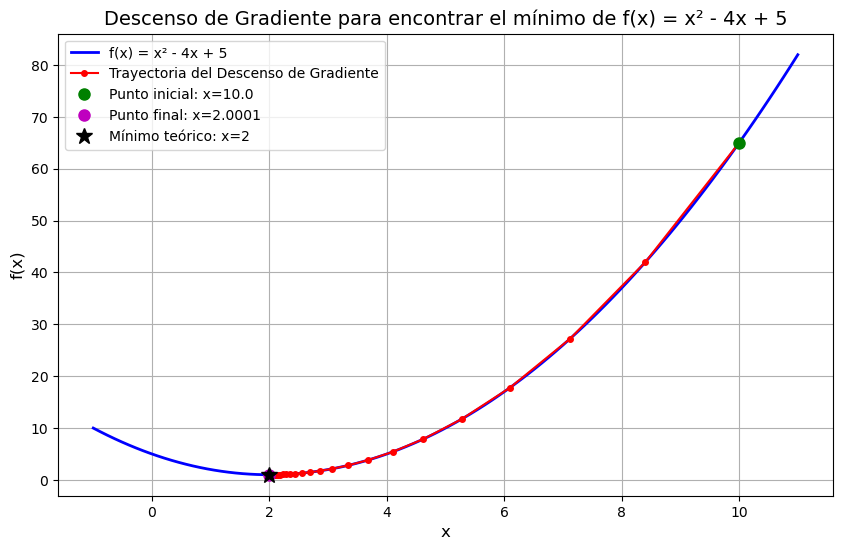

¿Convergió al mínimo teórico en x=2?
Error absoluto: 0.000114
Sí, el algoritmo convergió correctamente al mínimo.


In [4]:
# Generamos puntos para graficar la función
x_vals = np.linspace(-1, 11, 100)
y_vals = f(x_vals)

# Creamos la figura
plt.figure(figsize=(10, 6))

# Graficamos la función
plt.plot(x_vals, y_vals, 'b-', linewidth=2, label='f(x) = x² - 4x + 5')

# Graficamos la trayectoria del descenso de gradiente
plt.plot(trayectoria_x, trayectoria_y, 'ro-', markersize=4, label='Trayectoria del Descenso de Gradiente')

# Marcamos el punto de inicio y el punto final
plt.plot(trayectoria_x[0], trayectoria_y[0], 'go', markersize=8, label=f'Punto inicial: x={trayectoria_x[0]}')
plt.plot(trayectoria_x[-1], trayectoria_y[-1], 'mo', markersize=8, label=f'Punto final: x={trayectoria_x[-1]:.4f}')

# Marcamos el mínimo teórico
plt.plot(2, 1, 'k*', markersize=12, label='Mínimo teórico: x=2')

# Configuramos el gráfico
plt.title('Descenso de Gradiente para encontrar el mínimo de f(x) = x² - 4x + 5', fontsize=14)
plt.xlabel('x', fontsize=12)
plt.ylabel('f(x)', fontsize=12)
plt.grid(True)
plt.legend()

# Mostramos el gráfico
plt.show()

# Verificamos la convergencia
print(f"¿Convergió al mínimo teórico en x=2?")
print(f"Error absoluto: {abs(x - 2):.6f}")
if abs(x - 2) < 0.01:
    print("Sí, el algoritmo convergió correctamente al mínimo.")
else:
    print("No, el algoritmo no convergió completamente. Podrían necesitarse más iteraciones o una tasa de aprendizaje diferente.")

## Parte II: Aplicación a un Problema de Machine Learning

### El Conjunto de Datos: Hitters
Utilizaremos el dataset Hitters, que contiene estadísticas de jugadores de béisbol. Nuestro objetivo será predecir su Salary.

**URL del dataset:** https://gist.githubusercontent.com/keeganhines/59974f1ebef97bbaa44fb19143f90bad/raw/d9bcf657f97201394a59fffd801c44347eb7e28d/Hitters.csv

### El Modelo: Regresión Lasso
Usaremos la **Regresión Lasso**, cuya complejidad se controla con el hiperparámetro **alpha** ($\alpha$). Nuestra tarea será encontrar el $\alpha$ óptimo.

### 1. Carga y Preparación de Datos

In [5]:
# Importamos las bibliotecas necesarias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LassoCV
from sklearn.model_selection import LeaveOneOut
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
import warnings
warnings.filterwarnings('ignore')




In [6]:
# URL del dataset
url = "https://gist.githubusercontent.com/keeganhines/59974f1ebef97bbaa44fb19143f90bad/raw/d9bcf657f97201394a59fffd801c44347eb7e28d/Hitters.csv"

# Cargamos el dataset
hitters = pd.read_csv(url)

# Exploración inicial
print("Información del dataset:")
hitters.info()

Información del dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 322 entries, 0 to 321
Data columns (total 21 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  322 non-null    object 
 1   AtBat       322 non-null    int64  
 2   Hits        322 non-null    int64  
 3   HmRun       322 non-null    int64  
 4   Runs        322 non-null    int64  
 5   RBI         322 non-null    int64  
 6   Walks       322 non-null    int64  
 7   Years       322 non-null    int64  
 8   CAtBat      322 non-null    int64  
 9   CHits       322 non-null    int64  
 10  CHmRun      322 non-null    int64  
 11  CRuns       322 non-null    int64  
 12  CRBI        322 non-null    int64  
 13  CWalks      322 non-null    int64  
 14  League      322 non-null    object 
 15  Division    322 non-null    object 
 16  PutOuts     322 non-null    int64  
 17  Assists     322 non-null    int64  
 18  Errors      322 non-null    int64  
 19  Sala

In [7]:
print("\nEstadísticas descriptivas:")
print(hitters.describe())


Estadísticas descriptivas:
            AtBat        Hits       HmRun        Runs         RBI       Walks  \
count  322.000000  322.000000  322.000000  322.000000  322.000000  322.000000   
mean   380.928571  101.024845   10.770186   50.909938   48.027950   38.742236   
std    153.404981   46.454741    8.709037   26.024095   26.166895   21.639327   
min     16.000000    1.000000    0.000000    0.000000    0.000000    0.000000   
25%    255.250000   64.000000    4.000000   30.250000   28.000000   22.000000   
50%    379.500000   96.000000    8.000000   48.000000   44.000000   35.000000   
75%    512.000000  137.000000   16.000000   69.000000   64.750000   53.000000   
max    687.000000  238.000000   40.000000  130.000000  121.000000  105.000000   

            Years       CAtBat        CHits      CHmRun        CRuns  \
count  322.000000    322.00000   322.000000  322.000000   322.000000   
mean     7.444099   2648.68323   717.571429   69.490683   358.795031   
std      4.926087   2324.2

In [8]:
print("\nPrimeras filas del dataset:")
print(hitters.head())


Primeras filas del dataset:
          Unnamed: 0  AtBat  Hits  HmRun  Runs  RBI  Walks  Years  CAtBat  \
0     -Andy Allanson    293    66      1    30   29     14      1     293   
1        -Alan Ashby    315    81      7    24   38     39     14    3449   
2       -Alvin Davis    479   130     18    66   72     76      3    1624   
3      -Andre Dawson    496   141     20    65   78     37     11    5628   
4  -Andres Galarraga    321    87     10    39   42     30      2     396   

   CHits  ...  CRuns  CRBI  CWalks  League Division PutOuts  Assists  Errors  \
0     66  ...     30    29      14       A        E     446       33      20   
1    835  ...    321   414     375       N        W     632       43      10   
2    457  ...    224   266     263       A        W     880       82      14   
3   1575  ...    828   838     354       N        E     200       11       3   
4    101  ...     48    46      33       N        E     805       40       4   

   Salary  NewLeague  
0   

In [9]:
# Manejo de valores faltantes en la columna Salary
print(f"Dimensiones antes de eliminar valores faltantes: {hitters.shape}")
print(f"Valores faltantes en Salary: {hitters['Salary'].isna().sum()}")

hitters = hitters.drop(columns=['League','NewLeague','Division', 'Unnamed: 0'])

# Eliminamos las filas con valores faltantes en Salary
hitters_clean = hitters.dropna(subset=['Salary'])


print(f"Dimensiones después de eliminar valores faltantes: {hitters_clean.shape}")



Dimensiones antes de eliminar valores faltantes: (322, 21)
Valores faltantes en Salary: 59
Dimensiones después de eliminar valores faltantes: (263, 17)


In [10]:
# Separamos predictores (X) y objetivo (y)
X = hitters_clean.drop('Salary', axis=1)
y = hitters_clean['Salary']

print(f"Dimensiones de X: {X.shape}")
print(f"Dimensiones de y: {y.shape}")

Dimensiones de X: (263, 16)
Dimensiones de y: (263,)


### 2. Implementación de Validación Cruzada con Lasso



LASSO (Least Absolute Shrinkage and Selection Operator) es una variante de la regresión lineal que incluye una penalización sobre el tamaño de los coeficientes.

El modelo minimiza:
    Error cuadrático + λ * suma de los valores absolutos de los coeficientes

donde:
- y_i: valor real  
- ŷ_i: valor predicho por el modelo  
- β_j: coeficientes de las variables predictoras  
- λ (lambda): parámetro de regularización que controla la fuerza de la penalización  

Interpretación:
- Si λ es grande, los coeficientes se reducen mucho o incluso se vuelven cero.  
  Esto hace que el modelo elimine variables poco relevantes (selección automática de variables).  
- Si λ es pequeño, el modelo se comporta casi como una regresión lineal tradicional.

En resumen, LASSO ayuda a reducir el sobreajuste y simplifica el modelo eliminando variables irrelevantes.


### LOOCV

In [11]:
# Creamos el modelo con pipeline (escalado + Lasso con LOOCV)
lasso_loocv = make_pipeline(
    StandardScaler(),
    LassoCV(cv=LeaveOneOut(), random_state=1, max_iter=10000)
)

# Entrenamos el modelo
lasso_loocv.fit(X, y)

# Mostramos el alpha (λ) óptimo encontrado
print("Alpha óptimo encontrado con LOOCV:", lasso_loocv.named_steps['lassocv'].alpha_)

Alpha óptimo encontrado con LOOCV: 2.552820965069261


### Validacion cruzada k-folds

In [14]:
# Explicación de la configuración de LassoCV:
#
# - cv=10: Utilizamos validación cruzada con 10 pliegues (10-fold cross-validation).
#   Esto divide el dataset en 10 partes, usando 9 para entrenar y 1 para validar,
#   rotando sucesivamente hasta que todos los pliegues se usen para validación.
#   Este método proporciona una estimación más robusta del rendimiento del modelo.
#
# - random_state=1: Fijamos una semilla para garantizar la reproducibilidad.
#   Esto asegura que si ejecutamos el código múltiples veces, obtendremos los mismos resultados.
#
# 

# Creamos el modelo LassoCV
lasso_cv = LassoCV(cv=10, random_state=1, max_iter=10000)


In [15]:
# Entrenamos el modelo
lasso_cv.fit(X, y)


LassoCV(cv=10, max_iter=10000, random_state=1)

In [16]:
# Imprimimos el valor óptimo de alpha encontrado
print(f"Valor óptimo de alpha: {lasso_cv.alpha_:.4f}")

# Mostramos información sobre el modelo
print(f"\nCoeficientes del modelo (primeros 10):")
for i, (feature, coef) in enumerate(zip(X.columns[:10], lasso_cv.coef_[:10])):
    print(f"{feature}: {coef:.4f}")



Valor óptimo de alpha: 540.6557

Coeficientes del modelo (primeros 10):
AtBat: -0.0000
Hits: 1.4958
HmRun: 0.0000
Runs: 0.0000
RBI: 0.0000
Walks: 1.1397
Years: -0.0000
CAtBat: -0.3374
CHits: 0.8233
CHmRun: 0.0000


In [17]:
# Contamos cuántos coeficientes son exactamente cero
zero_coefs = np.sum(lasso_cv.coef_ == 0)
print(f"\nNúmero de características con coeficiente cero: {zero_coefs} de {len(lasso_cv.coef_)}")
print(f"Porcentaje de características eliminadas: {zero_coefs/len(lasso_cv.coef_)*100:.1f}%")


Número de características con coeficiente cero: 7 de 16
Porcentaje de características eliminadas: 43.8%


### 3. Análisis del Trade-off Sesgo-Varianza

In [18]:
# El objeto LassoCV entrenado almacena el MSE de cada pliegue para cada alpha
# en el atributo .mse_path_. La forma es (n_alphas, n_folds)
mse_path = lasso_cv.mse_path_
alphas = lasso_cv.alphas_

# Calculamos el MSE promedio a través de los 10 pliegues para cada valor de alpha
mse_mean = np.mean(mse_path, axis=1)
mse_std = np.std(mse_path, axis=1)

# Encontramos el alpha con el MSE promedio más bajo
best_idx = np.argmin(mse_mean)
best_alpha = alphas[best_idx]
best_mse = mse_mean[best_idx]

print(f"Alpha con MSE promedio más bajo: {best_alpha:.4f}")
print(f"MSE promedio correspondiente: {best_mse:.2f}")
print(f"Alpha seleccionado por LassoCV: {lasso_cv.alpha_:.4f}")

Alpha con MSE promedio más bajo: 540.6557
MSE promedio correspondiente: 118950.07
Alpha seleccionado por LassoCV: 540.6557


### Grafico

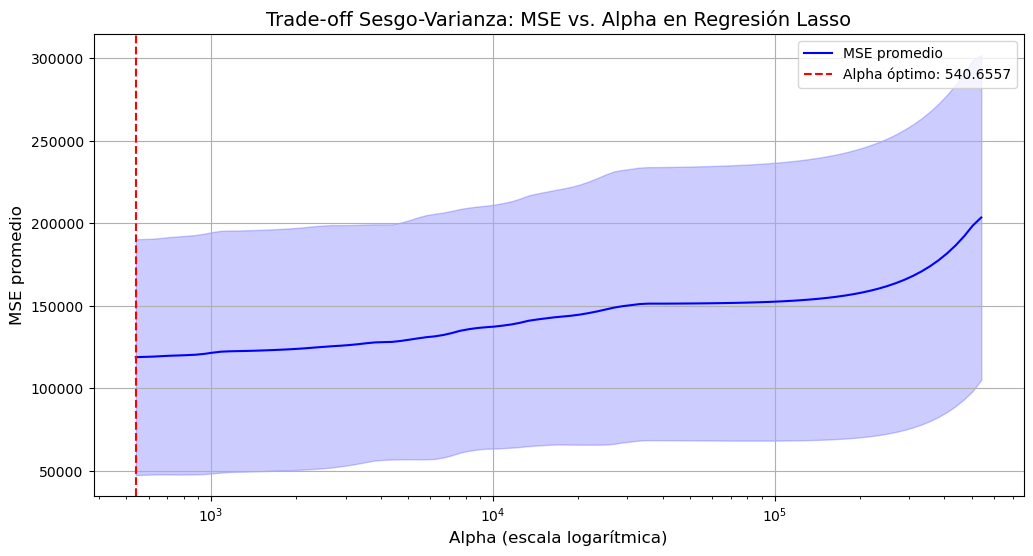

In [19]:
# Generamos un gráfico con los valores de alpha en el eje X (escala logarítmica) 
# y el MSE promedio en el eje Y
plt.figure(figsize=(12, 6))

# Graficamos el MSE promedio con su desviación estándar
plt.semilogx(alphas, mse_mean, 'b-', label='MSE promedio')
plt.fill_between(alphas, mse_mean - mse_std, mse_mean + mse_std, alpha=0.2, color='blue')

# Marcamos el alpha óptimo
plt.axvline(x=lasso_cv.alpha_, color='r', linestyle='--', 
            label=f'Alpha óptimo: {lasso_cv.alpha_:.4f}')

# Configuramos el gráfico
plt.title('Trade-off Sesgo-Varianza: MSE vs. Alpha en Regresión Lasso', fontsize=14)
plt.xlabel('Alpha (escala logarítmica)', fontsize=12)
plt.ylabel('MSE promedio', fontsize=12)
plt.grid(True)
plt.legend()

# Añadimos anotaciones para explicar las regiones
plt.annotate('Región de Underfitting\n(Alpha alto, modelo simple)',
             xy=(10, mse_mean[np.argmin(np.abs(alphas - 10))]),
             xytext=(20, mse_mean[np.argmin(np.abs(alphas - 10))] + 1000),
             arrowprops=dict(facecolor='black', shrink=0.05, width=1, headwidth=8),
             fontsize=10, ha='center')

plt.annotate('Región de Overfitting\n(Alpha bajo, modelo complejo)',
             xy=(0.01, mse_mean[np.argmin(np.abs(alphas - 0.01))]),
             xytext=(0.05, mse_mean[np.argmin(np.abs(alphas - 0.01))] + 1000),
             arrowprops=dict(facecolor='black', shrink=0.05, width=1, headwidth=8),
             fontsize=10, ha='center')

# Mostramos el gráfico
plt.show()

### Interpretación del Trade-off Sesgo-Varianza

El gráfico anterior representa claramente el trade-off sesgo-varianza en la Regresión Lasso:

1. **Región de Underfitting (Alpha alto):**
   - Cuando alpha es muy alto, la penalización es muy fuerte.
   - El modelo se vuelve demasiado simple (muchos coeficientes se hacen cero).
   - Esto resulta en un **alto sesgo** pero **baja varianza**.
   - El modelo no captura bien las relaciones en los datos, por lo que el MSE es alto.

2. **Región de Overfitting (Alpha bajo):**
   - Cuando alpha es muy bajo, la penalización es muy débil.
   - El modelo se vuelve demasiado complejo (casi todos los coeficientes son no nulos).
   - Esto resulta en un **bajo sesgo** pero **alta varianza**.
   - El modelo se ajusta demasiado a los datos de entrenamiento y no generaliza bien.

3. **Punto Óptimo (Alpha seleccionado):**
   - El valor óptimo de alpha equilibra el sesgo y la varianza.
   - Encuentra un modelo con complejidad adecuada que minimiza el error de generalización.
   - Este punto representa el mejor trade-off entre sesgo y varianza.

La validación cruzada nos permite encontrar este punto óptimo de manera objetiva, evaluando el rendimiento del modelo en datos no vistos durante el entrenamiento.

## Conclusiones

En esta práctica hemos implementado dos conceptos fundamentales en Machine Learning:

1. **Descenso de Gradiente:** Hemos implementado este algoritmo de optimización desde cero para encontrar el mínimo de una función simple. Este es el mismo principio que utilizan muchos algoritmos de Machine Learning para ajustar sus parámetros.

2. **Validación Cruzada y Trade-off Sesgo-Varianza:** Hemos aplicado la Regresión Lasso a un problema real, utilizando validación cruzada para encontrar el hiperparámetro óptimo. Esto nos ha permitido visualizar y entender el trade-off sesgo-varianza, un concepto crucial en Machine Learning.

